# 공공데이터 과제 #2
### 지하철 각 노선별 최대 하차 인원을 막대그래프로 표시하고, 하차인원 출력

In [15]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

In [20]:
df=pd.read_excel('subway.xls',sheet_name='지하철 시간대별 이용현황', header=[0,1])
df

사용월                호선명                역ID  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0              2022-06                1호선                150   
1              2022-06                1호선                151   
2              2022-06                1호선                152   
3              2022-06                1호선                153   
4              2022-06                1호선                154   
..                 ...                ...                ...   
610            2022-06                신림선               4407   
611            2022-06                신림선               4408   
612            2022-06                신림선               4409   
613            2022-06                신림선               4410   
614            2022-06                신림선               4411   

                  지하철역 04:00:00~04:59:59     05:00:00~05:59:59         \
    Unnamed: 3_level_1                승차  하차                승차     하차   
0                  서울역               646  24             8,433  7,694   
1                   시청               271   7             3,133  4,802   
2                   종각                91   9             4,007  3,960   
3                 종로3가               190  12             3,882  3,261   
4                 종로5가                34   0             1,730  3,909   
..                 ...               ...  ..               ...    ...   
610                 당곡                 0   0             1,061    118   
611                 신림                 2   1               651    153   
612                 서원                 2   1             1,287    151   
613            서울대벤처타운                10   3             3,314    166   
614           관악산(서울대)                 2   5               475    742   

    06:00:00~06:59:59          ... 23:00:00~23:59:59 00:00:00~00:59:59         \
                   승차      하차  ...                하차                승차     하차   
0              12,608  46,963  ...            15,480               158  1,332   
1               3,321  23,621  ...             2,938                72    422   
2               3,682  22,533  ...             3,590               315    394   
3               3,570  14,038  ...             4,119               310    843   
4               2,986  16,406  ...             2,628                98    668   
..                ...     ...  ...               ...               ...    ...   
610             2,650     704  ...             2,710               156    637   
611               853     488  ...             2,023               177    629   
612             2,552     513  ...             3,281                68    782   
613             5,162   1,676  ...             7,279               180  1,974   
614             1,258   1,712  ...             1,224                90    412   

    01:00:00~01:59:59     02:00:00~02:59:59    03:00:00~03:59:59     \
                   승차  하차                승차 하차                승차 하차   
0                   1   4                 0  1                 0  0   
1                   0   2                 0  0                 0  0   
2                   0   1                 0  0                 0  0   
3                   3   3                 0  0                 0  0   
4                   0   0                 0  0                 0  0   
..                ...  ..               ... ..               ... ..   
610                 0   0                 0  0                 0  0   
611                 0   1                 0  0                 0  0   
612                 2   2                 0  0                 0  0   
613                 1  40                 0  0                 0  0   
614                 1  33                 0  0                 0  0   

                    작업일시  
     Unnamed: 52_level_1  
0    2022-07-03 09:48:05  
1    2022-07-03 09:48:05  
2    2022-07-03 09:48:05  
3    2022-07-03 09:48:05  
4    2022-07-03 09:48:05  
..                   ...  
610  2022-07-03 09:48:05  
611  2022-07-03

In [17]:
# 필요한 열만 호출
commute_time_df=df.iloc[:,[1,3,11,13]].copy()

# 천단위 콤마 제거
commute_time_df.iloc[:,2]=commute_time_df.iloc[:,2].apply(lambda x : x.replace(',',''))
commute_time_df.iloc[:,3]=commute_time_df.iloc[:,3].apply(lambda x : x.replace(',',''))

# 데이터 타입 변경
commute_time_df=commute_time_df.astype({('07:00:00~07:59:59', '하차'):'int64'})
commute_time_df=commute_time_df.astype({('08:00:00~08:59:59', '하차'):'int64'})

In [18]:
line_list=[] #x축
max_number_list=[]

for i in range(1,8):
    
    # 각 호선별 불러오기
    line_df=commute_time_df[commute_time_df[('호선명',  'Unnamed: 1_level_1')]==str(i)+'호선']
    
    # 인원 합계
    row_sum_df=line_df.sum(axis=1,numeric_only=True)
    
    # 최대 인원
    max_number=row_sum_df.max(axis=0)
    
    # 최대인원 인덱스
    max_index = row_sum_df.idxmax()

    # 최대인원 역
    max_station=df.iloc[max_index,3]
    
    # 리스트에 호선/역, 최대인원 추가
    line_list.append(f'{i}호선 {max_station}역')
    max_number_list.append(max_number)
    
    print('출근 시간대 {}호선 최대 하차역은 {}역이고 하차인원은 {:,}명 입니다.'.format(i,max_station,max_number))




출근 시간대 1호선 최대 하차역은 종각역이고 하차인원은 330,536명 입니다.
출근 시간대 2호선 최대 하차역은 역삼역이고 하차인원은 479,969명 입니다.
출근 시간대 3호선 최대 하차역은 양재(서초구청)역이고 하차인원은 331,279명 입니다.
출근 시간대 4호선 최대 하차역은 충무로역이고 하차인원은 208,776명 입니다.
출근 시간대 5호선 최대 하차역은 여의도역이고 하차인원은 352,602명 입니다.
출근 시간대 6호선 최대 하차역은 공덕역이고 하차인원은 134,342명 입니다.
출근 시간대 7호선 최대 하차역은 가산디지털단지역이고 하차인원은 486,420명 입니다.


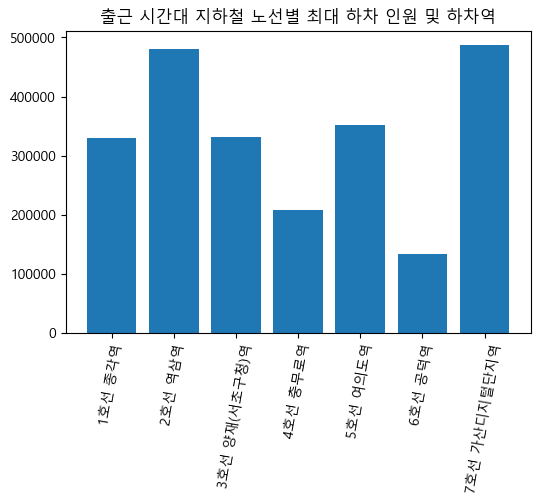

In [19]:
system_name=platform.system()
if system_name=='Windows':         # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name=='Darwin':       # Mac OS
    plt.rc('font',family='AppleGothic')
elif system_name=='Linux':        # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'  # => 폰트경로설정
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font',family=font_name)
else:
    print("Not support")

# 그래프 그리기
plt.figure(dpi=100)
plt.bar(line_list,max_number_list )
plt.xticks(rotation=80)
plt.title('출근 시간대 지하철 노선별 최대 하차 인원 및 하차역')
plt.show()